Support Vector Machine Classifier
===
(C) 2018 Dariusz Kajtoch

### Basic theory of Support Vector Machine (linear kernel)
---
### Some linear algebra facts
Hyperplane:
$$\mathcal{H}_{(\mathbf{w},w_0)} = \{\mathbf{x}: \mathbf{w}^{T} \cdot \mathbf{x} + w_0 = 0 \}.$$

Distance between two parallel hyperplanes, $\mathcal{H}_{(\mathbf{w},w_0)}$ and $\mathcal{H}_{(\mathbf{w},b)}$:
$$d = \frac{|w_0 - b|}{||\mathbf{w}||}.$$

Distance to a hyperplane:
$$d_{\mathbf{x}_0} = \frac{|\mathbf{w}^T \cdot \mathbf{x}_0 + w_0|}{||\mathbf{w}||}.$$

---
### Constrained optimization problem (convex)

Assumptions: 
* We have a training set $\{y_i, \mathbf{x}_i\}_{i=1}^{N}$, with $y_i \in \{-1,+1\}$ and p-dimensional feature vectors $\mathbf{x}_i$.
* Separating hyperplane $\mathcal{H}_{(\mathbf{w},w_0)}$ is a solution of the following constrained optimization problem:
$$
 \min\limits_{\mathbf{w},w_0,\xi} \frac{1}{2}||\mathbf{w}||^2 + C\sum\limits_{i=1}^{N}\xi_i^{\sigma},
$$
subject to constraints
$$\forall_i\ \ \ y_i ( \mathbf{w}^T \cdot \mathbf{x}_i + w_0) \geqslant 1-\xi_i,$$
$$\forall_i\ \ \ \xi_i \geqslant 0,$$
where $\xi_i$ are *slack variables* and $C$ is the penalty strength. In order to minimize the initial task, slack variables cannot be as large as possible and are equal to
$$\xi_i = \max(0, 1-y_i (\mathbf{w}^T \cdot \mathbf{x} + w_0)).$$

General solution:
$$\mathbf{w} = \sum\limits_{i=1}^{N}\alpha_i y_i \mathbf{x}_i,$$
where $\mathbf{x}_i$ corresponding to a non-zero value of $\alpha_i$ are called the *support vectors*. They either lie on a marginal hyperplane, i.e. $y_i (\mathbf{w}^T \cdot \mathbf{x}_i + w_0) = 1$ ($\xi_i = 0$) or are outliers ($\xi_i \neq 0$).

---
### Scikit-learn
* $\mathbf{w}$: `clf.coef_`
* $w_0$: `clf.intercept_`
* support vectors: `clf.support_vectors_`
* $\alpha_i y_i$: `clf.dual_coef_`

---
### Bibliography
[1] C. Cortes, V. Vapnik, *Support-vector networks*, Machine Learning, 20, 273-297 (1995).
<br>
[2] Trevor Hastie, Robert Tibshirani & Jerome Friedman, *The elements of statistical learning*, Springer (2009).
<br>
[3] James Gareth, Daniela Witten, Trevor Hastie & Robert Tibshirani, *An introduction to statistical learning with applications in R*, Springer (2013).
<br>
[4] Kevin P. Murphy, *Machine learning: a probabilistic perspective*, The MIT Press (2012).
<br>
[5] Christopher M. Bishop, *Pattern Recognition and machine learning*, Springer (2006).
<br>
[6] Meshryar Mohri, Afshin Rostamizadeh & Ameet Talwalkar, *Foundations of machine learning*, The MIT Press (2012).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# customize graphics
#sns.set_style('white')
sns.set_context('notebook')

# examine and customize further
#print( plt.rcParams )
plt.rcParams['text.usetex'] = True

plt.rcParams['figure.dpi'] = 200.0
plt.rcParams['figure.figsize'] = [10.0,5.0]

# axis
plt.rc('ytick', **{'direction':'in', 'right':True})
plt.rc('xtick', **{'direction':'in', 'top':True})
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.axisbelow'] = True

# grid
plt.rcParams['axes.grid'] = True
plt.rc('grid', **{'alpha':1.0, 'color':'0.3', 'linestyle': '--', 'linewidth': 0.5})

# legend
plt.rc('legend', **{'frameon':True, 'fancybox':True, 'framealpha':1.0, 'edgecolor':'1.0'})

# color pallete
from cycler import cycler
color_palette = plt.get_cmap('tab20').colors

plt.rcParams['axes.prop_cycle'] = cycler('color', color_palette)

In [2]:
# Plot decision boundary for a binary classifier
def plot_decision_boundary( ax, X, y, clf ):

    from matplotlib.colors import ListedColormap
    import numpy as np
    
    # ------------------------------
    # prediction region
    # ------------------------------
    # we assume that X has only two features
    xmin = np.min( X[:,0] ) - 0.5
    xmax = np.max( X[:,0] ) + 0.5
    ymin = np.min( X[:,1] ) - 0.5
    ymax = np.max( X[:,1] ) + 0.5
    
    # create a grid of points
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,200),
                         np.linspace(ymin,ymax,200)
                        )
    
    # predict output
    X_predict = np.c_[ xx.ravel(), yy.ravel() ]
    Z = clf.predict( X_predict )
    Z_reshaped = Z.reshape( xx.shape )
    
    cmap = ListedColormap( [color_palette[1], color_palette[3]] )
    ax.pcolormesh(xx, yy, Z_reshaped, 
                  cmap=cmap,
                  edgecolors=None,
                  alpha=0.4
                 )
    
    # ------------------------------
    # separating hyperplanes
    # ------------------------------
    # get the separating hyperplane
    # in sklearn: w^T * x + w0 = 0 
    w = clf.coef_[0]
    w0 = clf.intercept_[0]

    x_plane = np.linspace(xmin,xmax,100)
    y_plane = -w[0]/w[1] * x_plane - w0/w[1]
    
    ax.plot(x_plane, y_plane, lw=1., c='k')
    
    y_up = y_plane - 1./w[1]
    ax.plot(x_plane, y_up, lw=1., c='k', linestyle='dashed')
    y_down = y_plane + 1./w[1]
    ax.plot(x_plane, y_down, lw=1., c='k', linestyle='dashed')
    
    # mark support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
               s=80,
               marker='o',
               facecolors='none',
               edgecolors='k',
               linewidth=0.7
              )

    cmap = ListedColormap([color_palette[0], color_palette[2]])
    # ------------------------------
    # scatter plot of the input data
    # ------------------------------
    ax.scatter(X[:,0], X[:,1], 
               c=y, # colors
               s=15., # scale
               cmap=cmap,
               edgecolor='k'
              )

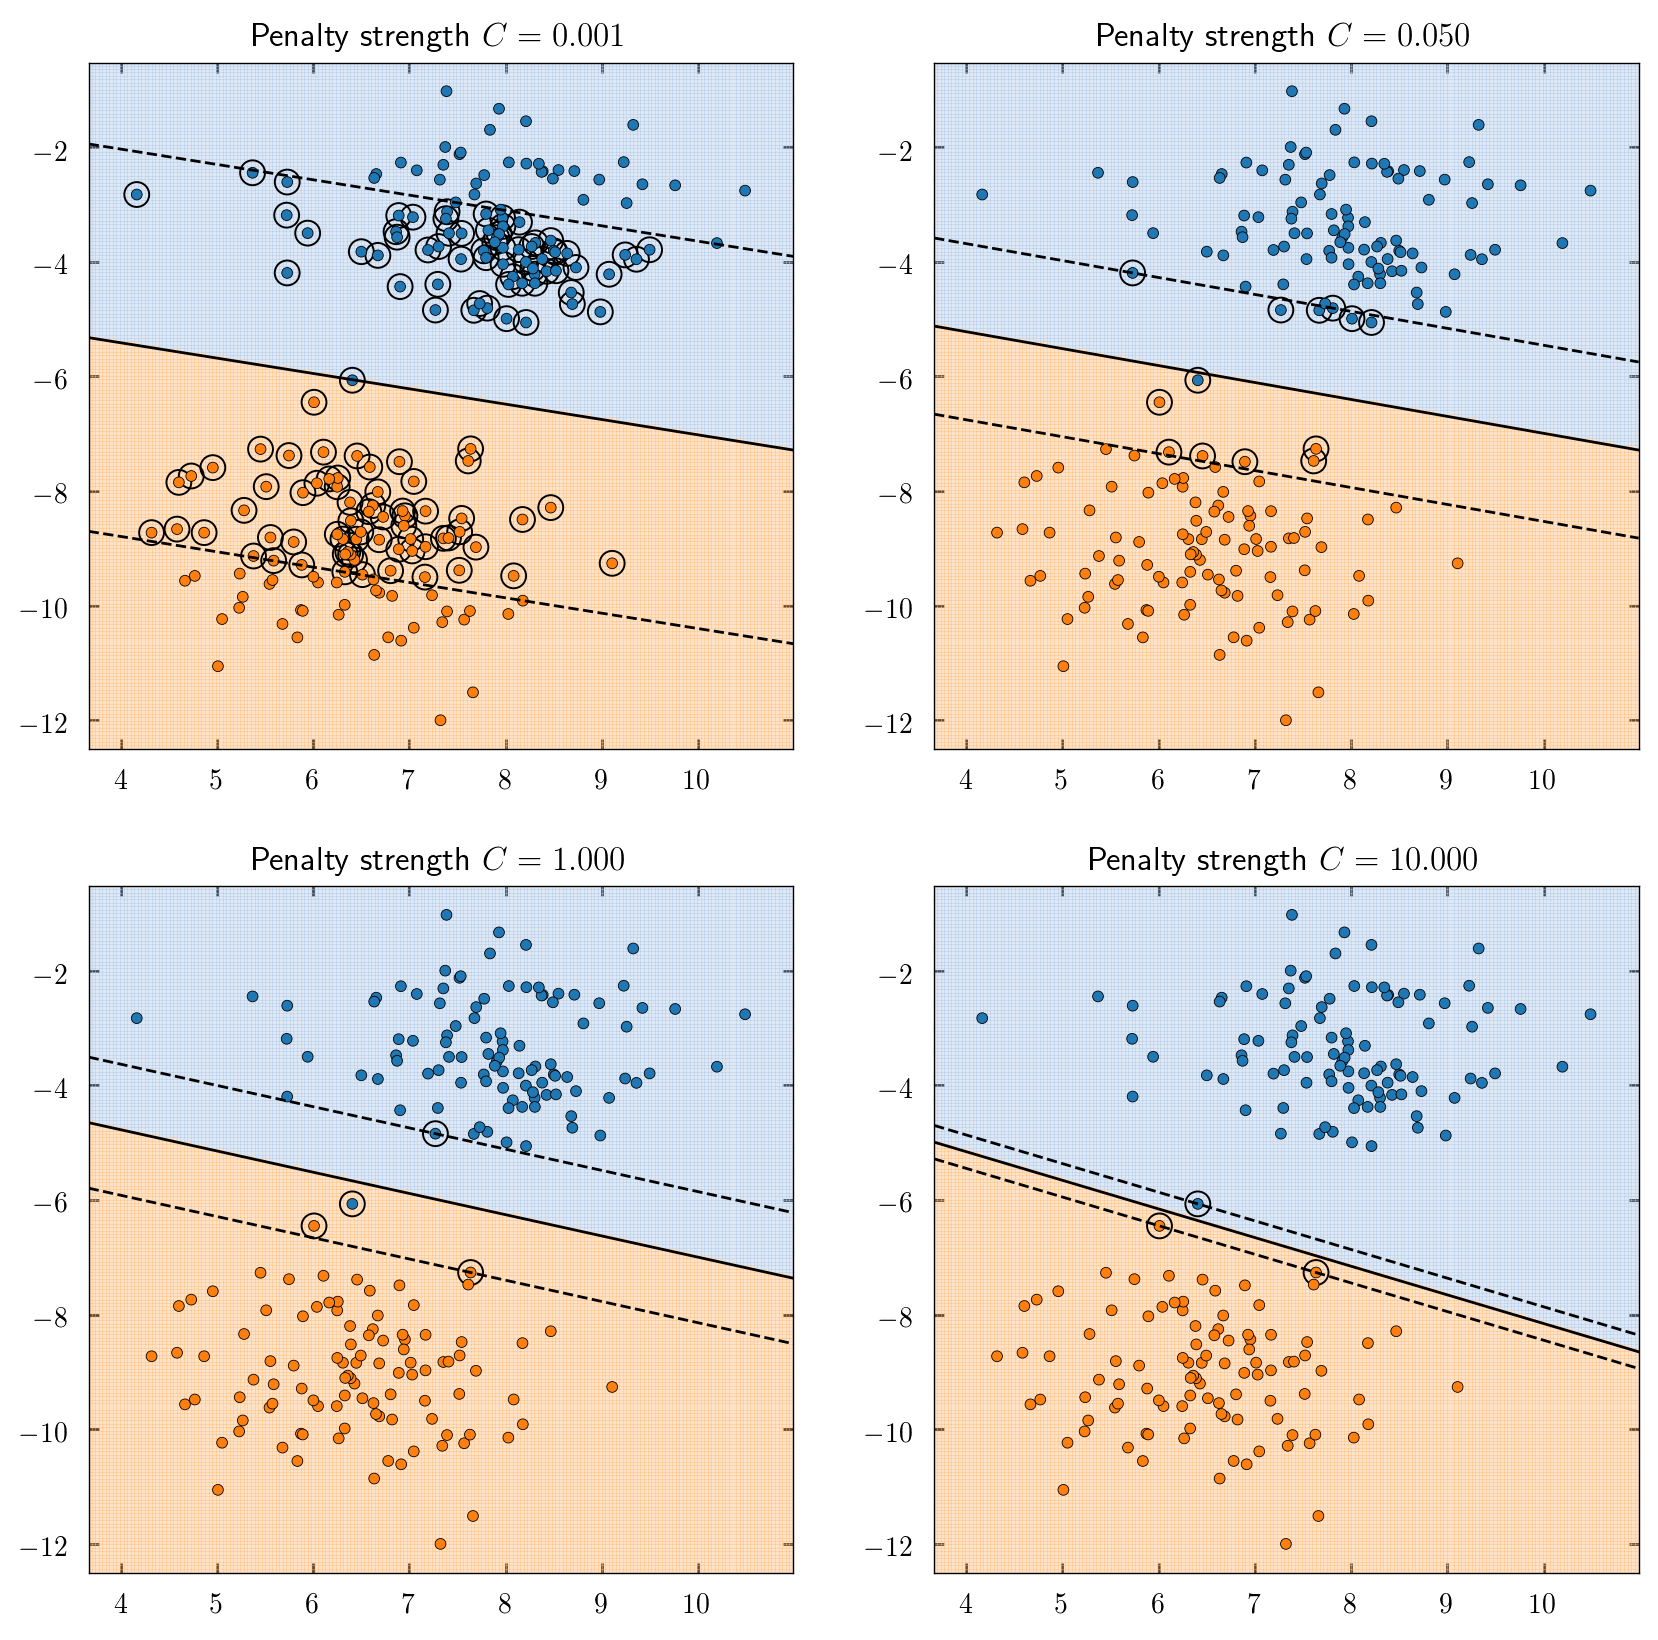

In [14]:
from sklearn.datasets import make_blobs
from sklearn import svm

# we create 40 separable points
X, y = make_blobs(n_samples=200, centers=2, random_state=6)

plt.close()
fig, ax = plt.subplots(figsize=(10,10),
                       nrows=2, 
                       ncols=2, 
                       gridspec_kw={'wspace':0.2, 'hspace':0.2}
                      )
ax = ax.ravel()

penalty = [0.001, 0.05, 1., 10.0]
for i in range(0,len(penalty)):
    clf = svm.SVC(kernel='linear', C=penalty[i], tol=1.0E-05)
    clf.fit(X, y)
    plot_decision_boundary(ax[i], X, y, clf)
    ax[i].set_title('Penalty strength $C = %.3f$' % penalty[i])
    
plt.savefig('fig_svc.pdf', bbox_inches='tight', dpi=200)
plt.savefig('fig_svc.png', bbox_inches='tight', dpi=600)